# Lesson 2: Morphing with Three Parameters

Expanding the number of morphing parameters

In [1]:
import ROOT
import rootnotes
c1 = rootnotes.default_canvas()

The previous example used the [RooLagrangeMorphFunc](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/RooEFTMorphFunc), to morph distributions based on only three input samples. This is based on the diagram: <img src="Diagrams/ggFZZ-EFT.png" alt="ziggle those higgles" style="width: 600px;"/>

Here we assume there there is no effects that contribute to this process in the Higgs production mechanism, such that all we need are three samples. One for the SM one each for positive and negative mixings of $\kappa_{AVV}$ with the SM.

In this next example we look at the process: <img src="Diagrams/VBFHWW-EFT.png" alt="wiggle it some more!" style="width: 600px;"/>

## Define input files and samples

The identifier and inputfilename has to change now, and also the sample names and observable names will be different. For this a look into the vbfWW input file might be helpful. 

Since the histograms in the new input file are named differently, you will also need to change the name of your observable. We suggest you use "twoSelJets/dphijj" for a start. 

In [2]:
identifier = "vbfWW" # avaliable: ggfWW, vbfWW, vbfZZ, ggfZZ, vbfMuMu 
infilename = "/eos/user/v/vcroft/morphingInputs/vbfhwwlvlv_3d.root" # give the input file name here
observable = "twoSelJets/dphijj" # name of the observable to be used (histogram name)

The list of input samples must match the names from the new file. In order to spare you the hassle of opening the ROOT file and re-typing the names, here they are: 

In [3]:
samplelist = ["kAwwkHwwkSM0","kAwwkHwwkSM1","kAwwkHwwkSM10","","kAwwkHwwkSM11","kAwwkHwwkSM12","kAwwkHwwkSM13","kAwwkHwwkSM2","kAwwkHwwkSM3","kAwwkHwwkSM4","kAwwkHwwkSM5","kAwwkHwwkSM6","kAwwkHwwkSM7","kAwwkHwwkSM8","kAwwkHwwkSM9","kSM0"]
# these are the validation samples: "v0","v1","v2","v3","v4","v5","v6","v7","v8","v9"

push all the input samples in a RooArgList

In [4]:
inputs = ROOT.RooArgList()

we need the additional list "inputnames" to prevent the python garbage collector from deleting the RooStringVars

In [5]:
inputnames = []
for sample in samplelist:
    v = ROOT.RooStringVar(sample,sample,sample)
    inputnames.append(v)
    inputs.add(v)

## setup predefined morphing function

Now, you have supplied the code with all the new inputs, but you will also need to instruct it about the different physics process. Luckily, there is again a pre-implemented specialized class called "RooEFTvbfWWMorphFunc", that already knows about the vertex structure of this process. So all you really need to do is change the call to the constructor of your morphing function. You will later learn how to implement the morphing for completely new physics processes and create new specialized classes like this one for the process of your choice.

In [6]:
morphfunc = ROOT.RooHCvbfWWMorphFunc(identifier,identifier,infilename,observable,inputs)

morph to the validation sample v1 ![morph it up](https://media.giphy.com/media/3o6YgphNy4s4MGQyuQ/giphy.gif "It's morphin time")

In [7]:
validationsample = "v1"
morphfunc.setParameters(validationsample)
morphing = morphfunc.createTH1("morphing")

## Read The Validation Histogram

We now retrieve the corresponding histogram of the validation sample from the same input file. 

In [8]:
tfile = ROOT.TFile.Open(infilename,"READ")
folder = tfile.Get(validationsample)
validation = folder.FindObject(observable)
validation.SetDirectory(0)
validation.SetTitle(validationsample)
tfile.Close()

## Print the pretty plots!
we use the canvas created above and add legend in order to plot both histograms - the one obtained from the validation sample and the morphing prediction for the same parameter set - for comparison.

Here I use the rootnotes macro to provide inline plots. On newer releases this isn't necesarry, but then the Function isn't available... 

Here I use the rootnotes macro to provide inline plots on newer releases this isn't necesarry.

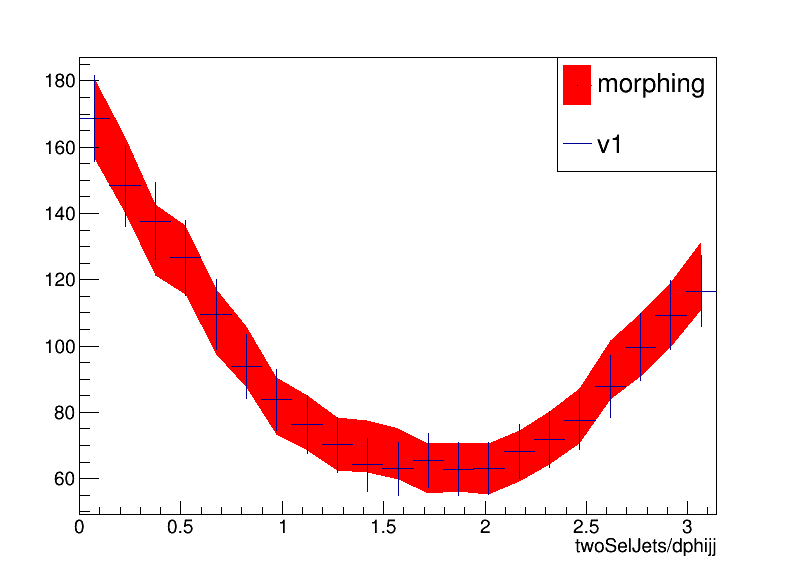

In [9]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
morphing.GetXaxis().SetTitle(observable)
morphing.SetLineColor(2)
morphing.SetFillColor(2)
morphing.Draw("E3")
validation.Draw("SAME")
leg = ROOT.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(morphing)
leg.AddEntry(validation)
leg.Draw()
c1

## Playground
* We did not say which parameters are modeled by the morphing in this example. Can you figure out which ones just from looking at the "param_card" histograms?
* This lesson needs more input samples than the previous one (15 as compared to 3). This has two reasons: One is the higher dimensionality, the other is the fact that the vertex structure of the VBF Higgs production with decay to vector bosons is different from the same decay in the ggF production mode. A detailed explanation of this can be found in [our note](https://cds.cern.ch/record/2066980) (p. 8f, formulae 25ff). Use these formulae to check our calculations of the numbers of input samples. Do you also arrive at the numbers 3 for lesson 1 and 15 for lesson 2?
* This input dataset conains a rather large list of validation samples: "v0","v1","v2","v3","v4","v5","v6","v7","v8","v9". You can again try replacing some of your inputs with these. Is every combination possible, or are there combinations which don't work? 